In [2]:
%pylab inline
import torch
import numpy

Populating the interactive namespace from numpy and matplotlib


# Сделаем данные, которые будем востанавливать
Для начала предлагается взять $sin(x)$ с шумом как нелинейную функцию для демонстрации мощи нейронных сетей.

Text(0.5,1,'y = sin(x)')

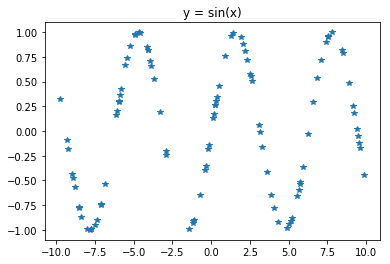

In [3]:
x = numpy.random.rand(100)
x = x * 20.0 - 10.0# <- x распределен от -10 до 10 равномерно
y = numpy.sin(x)
plot(x, y, '*')
title('y = sin(x)')

Text(0.5,1,'White Noise')

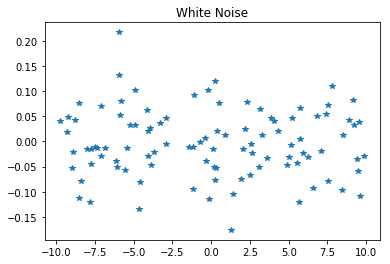

In [4]:
noise = numpy.random.randn(*y.shape)
noise = 0.1 / numpy.linalg.norm(noise) * numpy.linalg.norm(y) * noise # 10% шума
plot(x, noise, '*')
title('White Noise')

Text(0.5,1,'Noisy sin(x)')

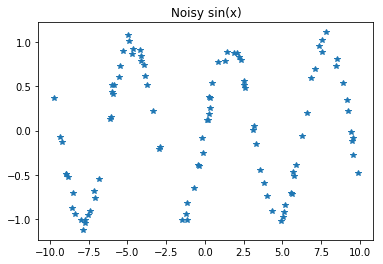

In [5]:
y_noisy = y + noise
plot(x, y_noisy, '*')
title('Noisy sin(x)')

Мы будем восстанавливать $y$ по $x$

# Создание модели

In [5]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
sine_net = SineNet(50)

(100,)
(100,)
(100, 1)


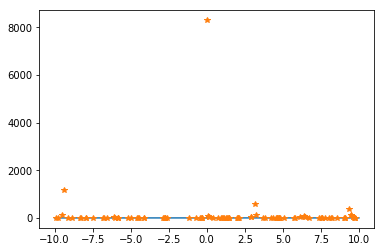

In [6]:
# Что выдает нетренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
x_var = torch.autograd.Variable(x_t)
y_pred = sine_net.forward(x_var) # Прогноз
y_pred = y_pred.data.numpy()
print(x.shape)
print(y.shape)
print(y_pred.shape)
plot(x_valid, y_pred)
plot(x, y, '*')

In [7]:
# Определяем loss
def loss(pred, targ):
    res = (pred - targ) ** 2
    return res.mean()

In [8]:
# Выбираем оптимизатор
import torch.optim

optimizer = torch.optim.Adam(sine_net.parameters(), lr=1.0e-1)

In [9]:
# One epoch
batch_size = 20

order = numpy.random.permutation(x.size)

for start_index in range(0, x.size, batch_size):
    
    optimizer.zero_grad()
    
    batch_items = order[start_index:start_index+batch_size]
    x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
    y_batch = torch.FloatTensor(y[batch_items].reshape([-1, 1]))
    
    x_var = torch.autograd.Variable(x_batch)
    y_var = torch.autograd.Variable(y_batch)
    
    y_pred = sine_net.forward(x_var)
    loss_val = loss(y_pred, y_var)
    
    loss_val.backward()
    
    optimizer.step()
    
    print(x_batch.shape, y_batch.shape)

torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])
torch.Size([20, 1]) torch.Size([20, 1])


(100,)
(100,)
(100, 1)


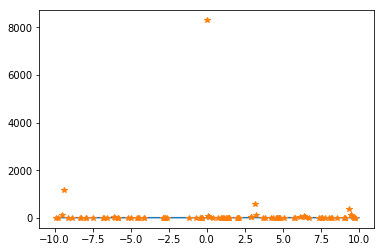

In [10]:
# Что выдает тренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
x_var = torch.autograd.Variable(x_t)
y_pred = sine_net.forward(x_var) # Прогноз
y_pred = y_pred.data.numpy()
print(x.shape)
print(y.shape)
print(y_pred.shape)
plot(x_valid, y_pred)
plot(x, y, '*')

In [11]:
# Several epochs
batch_size = 100

for epoch_index in range(2000):
    order = numpy.random.permutation(x.size)

    for start_index in range(0, x.size, batch_size):
    
        optimizer.zero_grad()
    
        batch_items = order[start_index:start_index+batch_size]
        x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
        y_batch = torch.FloatTensor(y[batch_items].reshape([-1, 1]))
    
        y_pred = sine_net.forward(x_batch)
        loss_val = loss(y_pred, y_batch)
    
        loss_val.backward()
    
        optimizer.step()
        
    if epoch_index % 100 == 0:
        print(loss_val.data.numpy().round(5))
    

704040.44
671743.06
668386.9
665957.25
663604.75
661386.3
659324.4
657379.56
655514.6
653705.2
651830.5
645336.1
640318.56
635935.06
631890.75
628065.44
624396.1
620844.94
614454.06
606491.7


(100,)
(100,)
(100, 1)


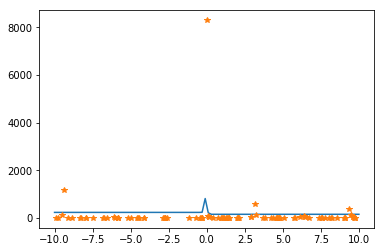

In [12]:
# Что выдает тренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
x_var = torch.autograd.Variable(x_t)
y_pred = sine_net.forward(x_var) # Прогноз
y_pred = y_pred.data.numpy()
print(x.shape)
print(y.shape)
print(y_pred.shape)
plot(x_valid, y_pred[:,0])
plot(x, y, '*')

x_var = torch.autograd.Variable(torch.Tensor(x.reshape([-1, 1])))
y_var = torch.autograd.Variable(torch.Tensor(y))

# Задание 1

Сделайте обучение на зашумленных данных и посмотрите, насколько зависимость от незашумленных данных.
Доп задание: обоснуйте, что в данном случае использование метода наименьших квадратов статистически корректно. Привидите пример шума, когда использование метода наименьших квадратов (MSE как функции ошибки) статистически необоснованно.

In [13]:
sine_net = SineNet(50)

optimizer = torch.optim.Adam(sine_net.parameters(), lr=1.0e-1)

In [14]:
# Several epochs
batch_size = 100

for epoch_index in range(2000):
    order = numpy.random.permutation(x.size)

    for start_index in range(0, x.size, batch_size):
    
        optimizer.zero_grad()
    
        batch_items = order[start_index:start_index+batch_size]
        x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
        y_batch = torch.FloatTensor(y_noisy[batch_items].reshape([-1, 1]))
    
        y_pred = sine_net.forward(x_batch)
        loss_val = loss(y_pred, y_batch)
    
        loss_val.backward()
    
        optimizer.step()
        
    if epoch_index % 100 == 0:
        print(loss_val.data.numpy().round(5))
    

714167.94
683138.75
679927.56
677590.44
675205.06
672763.0
670482.94
668392.3
666435.0
664554.25
657765.2
652589.1
645458.1
636906.25
623163.2
608422.8
596547.0
585993.56
576266.56
567124.6


(100,)
(100,)
(100, 1)


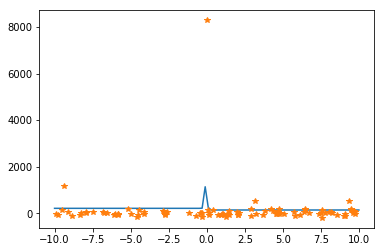

In [15]:
# Что выдает тренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
y_pred = sine_net.forward(x_t) # Прогноз
y_pred = y_pred.data.numpy()
print(x.shape)
print(y.shape)
print(y_pred.shape)
plot(x_valid, y_pred[:,0])
plot(x, y_noisy, '*')


# Задание 2
Уменьшите количество данных (в случае с зашумленными данными) до 1) 100 точек 2) 20 точек. Что происходит с моделью? Она все еще работоспособна?

In [16]:
sine_net = SineNet(50)

optimizer = torch.optim.Adam(sine_net.parameters(), lr=1.0e-1)

In [17]:
# Several epochs
batch_size = 100

for epoch_index in range(2000):
    order = numpy.random.permutation(x.size)

    for start_index in range(0, x.size, batch_size):
    
        optimizer.zero_grad()
    
        batch_items = order[start_index:start_index+batch_size]
        x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
        y_batch = torch.FloatTensor(y_noisy[batch_items].reshape([-1, 1]))
    
        y_pred = sine_net.forward(x_batch)
        loss_val = loss(y_pred, y_batch)
    
        loss_val.backward()
    
        optimizer.step()
        
    if epoch_index % 100 == 0:
        print(loss_val.data.numpy().round(5))
    

714249.7
683343.4
680054.5
677759.4
675366.5
672791.3
670158.7
664154.0
658343.56
649833.0
641116.75
629303.44
619922.6
611539.44
603756.1
596274.6
583459.06
573248.2
563999.06
555314.75


(100,)
(100,)
(100, 1)


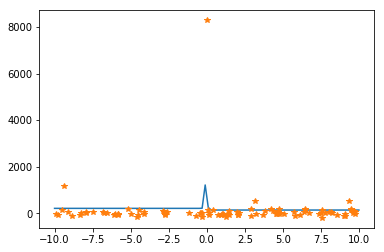

In [18]:
# Что выдает тренированная сеть
x_valid = linspace(-10, 10, 100)
x_valid = x_valid.reshape([-1, 1])
x_t = torch.FloatTensor(x_valid)
y_pred = sine_net.forward(x_t) # Прогноз
y_pred = y_pred.data.numpy()
print(x.shape)
print(y.shape)
print(y_pred.shape)
plot(x_valid, y_pred[:,0])
plot(x, y_noisy, '*')


# Задание 3
Проделайте то же самое для функции $(\sin x)^2$ и для функции $1 / (\sin x)^2$. Почему в последнем случае не получается ничего хорошего?